In [2]:
using ITensors
import TensorCrossInterpolation as TCI
using TCIITensorConversion
using QuanticsGrids
using Plots
include("../../src/functions.jl")

packages uploaded
------------------------------


functions uploaded
------------------------------


In [7]:
n = 20
x_max = 10
k_max = 10



mps_QFT = QFT_mps(n, x_max, k_max)
println()



In [25]:
max_bond = 100
g(x) =  cos(3x)+ cos(5x)+ exp(1im*7x)
mps_fk = FT_fun(g, k_max, max_bond)

MPS
[1] ((dim=2|id=543|"n=21"), (dim=2|id=207|"l=21,link"))
[2] ((dim=2|id=456|"n=22"), (dim=4|id=948|"l=22,link"), (dim=2|id=207|"l=21,link"))
[3] ((dim=2|id=976|"n=23"), (dim=8|id=565|"l=23,link"), (dim=4|id=948|"l=22,link"))
[4] ((dim=2|id=557|"n=24"), (dim=16|id=595|"l=24,link"), (dim=8|id=565|"l=23,link"))
[5] ((dim=2|id=139|"n=25"), (dim=15|id=782|"l=25,link"), (dim=16|id=595|"l=24,link"))
[6] ((dim=2|id=121|"n=26"), (dim=12|id=409|"l=26,link"), (dim=15|id=782|"l=25,link"))
[7] ((dim=2|id=366|"n=27"), (dim=10|id=358|"l=27,link"), (dim=12|id=409|"l=26,link"))
[8] ((dim=2|id=117|"n=28"), (dim=9|id=753|"l=28,link"), (dim=10|id=358|"l=27,link"))
[9] ((dim=2|id=714|"n=29"), (dim=7|id=930|"l=29,link"), (dim=9|id=753|"l=28,link"))
[10] ((dim=2|id=462|"n=30"), (dim=7|id=313|"l=30,link"), (dim=7|id=930|"l=29,link"))
[11] ((dim=2|id=688|"n=31"), (dim=6|id=494|"l=31,link"), (dim=7|id=313|"l=30,link"))
[12] ((dim=2|id=800|"n=32"), (dim=5|id=113|"l=32,link"), (dim=6|id=494|"l=31,link"))
[13] 

In [24]:
using Plots
using LaTeXStrings

# Set default font family (Times New Roman) and apply individual font sizes
default(fontfamily="Times New Roman")

function plot_mps(mps, k_range::LinRange{Float64, Int64}, label=L"\tilde{f}(k) \, \textit{vs} \,k", xlabel=L"k", ylabel=L"\tilde{f}(k)")
    Fk = []
    Lk = length(mps)
    Lx = Lk
    for k in k_range
        s = c2b(k/(2k_max) + 1/2 ,Lk) 
        push!(Fk , evaluate(mps,s)/2^(Lx))
    end


    scatter(k_range, real.(Fk), label=label, xlabel=xlabel, ylabel=ylabel, 
        legend=:topright, grid=true,
        titlefont=14, guidefont=12, tickfont=10, markersize = 3)  # Set fonts for title, axis labels, and ticks
    
end

plot_mps (generic function with 12 methods)

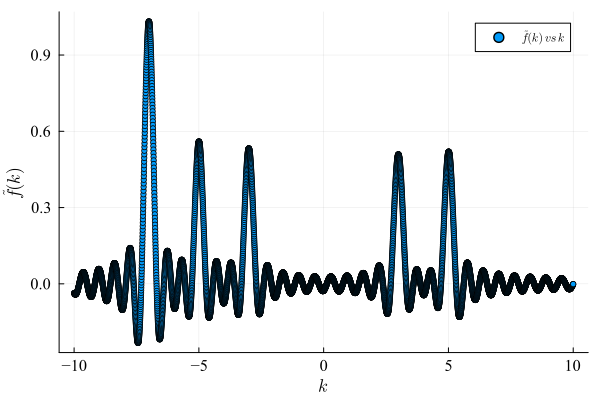

In [26]:
k_range = LinRange(-x_max,x_max,6500)
plot_mps(mps_fk, k_range)